# Simple example of the evolutionary optimization framework

This notebook provides a simple example for the use of the evolutionary optimization framework builtin to the library. Under the hood, the implementation of the evolutionary algorithm is powered by `deap` and `pypet` cares about the parallelization and storage of the simulation data for us. 

Here we demonstrate how to fit parameters of a the evaluation function `optimize_me` which simply computes the distance of the parameters to the unit circle and returns this as the `fitness_tuple` that DEAP expects.

In [7]:
# change into root directory to the project
import os
if os.getcwd().split("/")[-1] == "examples":
    print("chdir")
    os.chdir('..')

In [ ]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

import neurolib.optimize.evolution.evolutionaryUtils as eu
import neurolib.utils.functions as func

import random

def optimize_me(traj):
    global evolution
    ind = evolution.getIndividualFromTraj(traj)
    print("Hello, I am {}".format(ind.id))
    print("You can also call me {}, or simply ({:.2}, {:.2}).".format(ind.params, ind.x, ind.y))
    
    # let's make a circle
    computation_result = abs((ind.x**2 + ind.y**2) - 1)
    # DEAP wants a tuple as fitness, ALWAYS!
    fitness_tuple = (computation_result ,)
    
    # we also require a dictionary with at least a single result for storing the results in the hdf
    result_dict = {"result" : [computation_result]}
    
    return fitness_tuple, result_dict

    
pars = ParameterSpace(['x', 'y'], [[-5.0, 5.0], [-5.0, 5.0]])
evolution = Evolution(optimize_me, pars, weightList = [-1.0], POP_INIT_SIZE=10, POP_SIZE = 4, NGEN=4)
evolution.run(verbose = False)

/Users/caglar/anaconda/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
/Users/caglar/anaconda/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/caglar/anaconda/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
INFO:root:Storing data to: ./data/hdf/evolution.hdf
INFO:root:Trajectory Name: results-2020-02-03-00H-17M-51S
INFO:root:Number of cores: 8
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$', 'crun')`.
DEBUG:pypet.trajectory.Trajectory:Added wildcard function `('$set', 'crunset')`.
MainProcess pypet.storageservice.HDF5StorageService INFO     I wi

Hello, I am 0
You can also call me OrderedDict([('x', 3.986572042441205), ('y', 0.5106450047952205)]), or simply (4.0, 0.51).
Hello, I am 1
You can also call me OrderedDict([('x', 2.1476762493724912), ('y', 1.4912115863855355)]), or simply (2.1, 1.5).
Hello, I am 2
You can also call me OrderedDict([('x', 1.8947536481416805), ('y', -0.46574776125506556)]), or simply (1.9, -0.47).
Hello, I am 3
You can also call me OrderedDict([('x', 1.3870766744017278), ('y', 2.8394771580607605)]), or simply (1.4, 2.8).
Hello, I am 4
You can also call me OrderedDict([('x', -2.9224559732539133), ('y', -3.131091571948794)]), or simply (-2.9, -3.1).
Hello, I am 5
You can also call me OrderedDict([('x', -1.324119081664079), ('y', 2.4414067175767844)]), or simply (-1.3, 2.4).
Hello, I am 6
You can also call me OrderedDict([('x', -1.713592364130009), ('y', 0.7166438371359183)]), or simply (-1.7, 0.72).
Hello, I am 7
You can also call me OrderedDict([('x', 0.6261833400802521), ('y', -3.2727505194239193)]), or 

MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/storageservice.py:4597: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if (np.issubdtype(val.dtype, str) or
/Users/caglar/anaconda/lib/python3.7/site-packages/pypet/storageservice.py:4598: FutureWarning: Conversion of the second argument of issubdtype from `bytes` to `bytes` is deprecated. In future, it will be treated as `np.bytes_ == np.dtype(bytes).type`.
  np.issubdtype(val.dtype, bytes)):
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-02-03-00H-17M-51S`.
MainProcess pypet.environment

[(0, ((15.15351497049615,), {'result': [15.15351497049615]})), (1, ((5.836225267489157,), {'result': [5.836225267489157]})), (2, ((2.807012364260313,), {'result': [2.807012364260313]})), (3, ((8.98661223181817,), {'result': [8.98661223181817]})), (4, ((17.344483347536247,), {'result': [17.344483347536247]})), (5, ((6.713758103055973,), {'result': [6.713758103055973]})), (6, ((2.449977179709566,), {'result': [2.449977179709566]})), (7, ((10.103001537783594,), {'result': [10.103001537783594]})), (8, ((40.2520243815255,), {'result': [40.2520243815255]})), (9, ((4.714002443336306,), {'result': [4.714002443336306]}))]
Hello, I am 10
You can also call me OrderedDict([('x', -2.830209658739644), ('y', -1.2957833812931603)]), or simply (-2.8, -1.3).
Hello, I am 11
You can also call me OrderedDict([('x', -4.045671891616865), ('y', -0.48816689021994575)]), or simply (-4.0, -0.49).
Hello, I am 12
You can also call me OrderedDict([('x', -0.07033681271004255), ('y', 1.4116603447557128)]), or simply 

MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-02-03-00H-17M-51S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED FINAL STORING of trajectory
`results-2020-02-03-00H-17M-51S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-02-03-00H-17M-51S` were completed successfully.
MainProcess root INFO     Best individual is [-0.07033681271004255, 1.4116603447557128, 4.772982928846085, 2.5981860459284105]
MainProcess root INFO     Score: -0.9977321961780254
MainProcess root INFO     Fitness: (0.9977321961780254,)
MainProcess root INFO     --- Population statistics ---
MainProcess pypet

[(10, ((8.689141283658708,), {'result': [8.689141283658708]})), (11, ((15.6057679673258,), {'result': [15.6057679673258]})), (12, ((0.9977321961780254,), {'result': [0.9977321961780254]})), (13, ((6.304550032450459,), {'result': [6.304550032450459]}))]
Hello, I am 14
You can also call me OrderedDict([('x', 1.9093302757766653), ('y', -3.0495070872399896)]), or simply (1.9, -3.0).
Hello, I am 15
You can also call me OrderedDict([('x', 3.419835483675001), ('y', 2.709948896737322)]), or simply (3.4, 2.7).
Hello, I am 16
You can also call me OrderedDict([('x', -2.287708387581975), ('y', 0.292457383447744)]), or simply (-2.3, 0.29).
Hello, I am 17
You can also call me OrderedDict([('x', 3.337962712237726), ('y', -2.6558975142637324)]), or simply (3.3, -2.7).


MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-02-03-00H-17M-51S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED FINAL STORING of trajectory
`results-2020-02-03-00H-17M-51S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-02-03-00H-17M-51S` were completed successfully.
MainProcess root INFO     Best individual is [-0.07033681271004255, 1.4116603447557128, 4.772982928846085, 2.5981860459284105]
MainProcess root INFO     Score: -0.9977321961780254
MainProcess root INFO     Fitness: (0.99

[(14, ((11.945035577124322,), {'result': [11.945035577124322]})), (15, ((18.039097758330456,), {'result': [18.039097758330456]})), (16, ((4.31914098774602,), {'result': [4.31914098774602]})), (17, ((17.195786674561706,), {'result': [17.195786674561706]}))]
Hello, I am 18
You can also call me OrderedDict([('x', -2.5053009743368735), ('y', 1.7045141977576774)]), or simply (-2.5, 1.7).
Hello, I am 19
You can also call me OrderedDict([('x', -0.8849925962172994), ('y', 1.0603824629529104)]), or simply (-0.88, 1.1).
Hello, I am 20
You can also call me OrderedDict([('x', -2.105944050415351), ('y', -0.08664521986815499)]), or simply (-2.1, -0.087).
Hello, I am 21
You can also call me OrderedDict([('x', 0.8397709904332289), ('y', 1.165039178346576)]), or simply (0.84, 1.2).


MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `results`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Storing branch `derived_parameters`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Finished storing Trajectory `results-2020-02-03-00H-17M-51S`.
MainProcess pypet.environment.Environment INFO     
************************************************************
FINISHED FINAL STORING of trajectory
`results-2020-02-03-00H-17M-51S`.
************************************************************

MainProcess pypet.environment.Environment INFO     All runs of trajectory `results-2020-02-03-00H-17M-51S` were completed successfully.
MainProcess root INFO     Best individual is [-0.8849925962172994, 1.0603824629529104, 3.701813843012711, 2.100088880885067]
MainProcess root INFO     Score: -0.9076228630975165
MainProcess root INFO     Fitness: (0.9076228630975165,)
MainProcess root INFO     --- Population statistics ---
MainProcess pypet.s

[(18, ((8.181901622370786,), {'result': [8.181901622370786]})), (19, ((0.9076228630975165,), {'result': [0.9076228630975165]})), (20, ((3.4425077376058155,), {'result': [3.4425077376058155]})), (21, ((1.062531603455671,), {'result': [1.062531603455671]}))]


In [4]:
traj = evolution.loadResults()

MainProcess root INFO     Loading results from ./data/hdf/evolution.hdf
MainProcess root INFO     Analyzing trajectory results-2020-02-03-00H-17M-51S
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading trajectory `results-2020-02-03-00H-17M-51S`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `config` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `derived_parameters` in mode `1`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `parameters` in mode `2`.
MainProcess pypet.storageservice.HDF5StorageService INFO     Loading branch `results` in mode `1`.


Parameters dictribution (Generation 3):
x: 	 mean: -0.4573,	 std: 0.9478
y: 	 mean: 1.088,	 std: 0.2497
There are 4 valid individuals
Mean score across population: -1.4


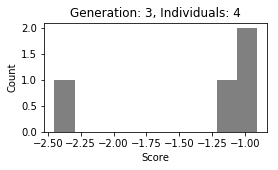

<Figure size 432x288 with 0 Axes>

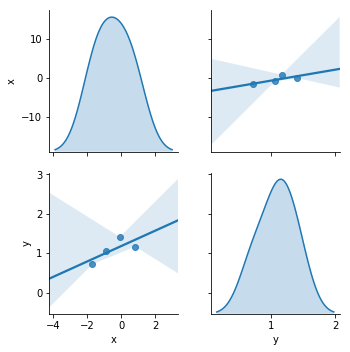

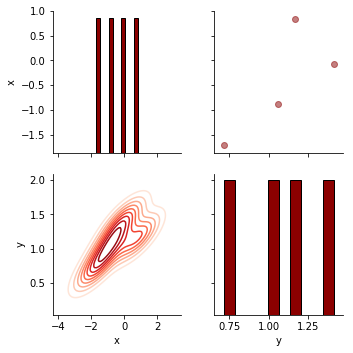

--------------------------
Best 20 individuals:
Printing 4 individuals
Individual 0 pars x -0.885, y 1.06
	Fitness values:  0.9076
Individual 1 pars x -0.07034, y 1.412
	Fitness values:  0.9977
Individual 2 pars x 0.8398, y 1.165
	Fitness values:  1.0625
Individual 3 pars x -1.714, y 0.7166
	Fitness values:  2.45


In [5]:
evolution.info(plot=True)

Text(0, 0.5, 'Score')

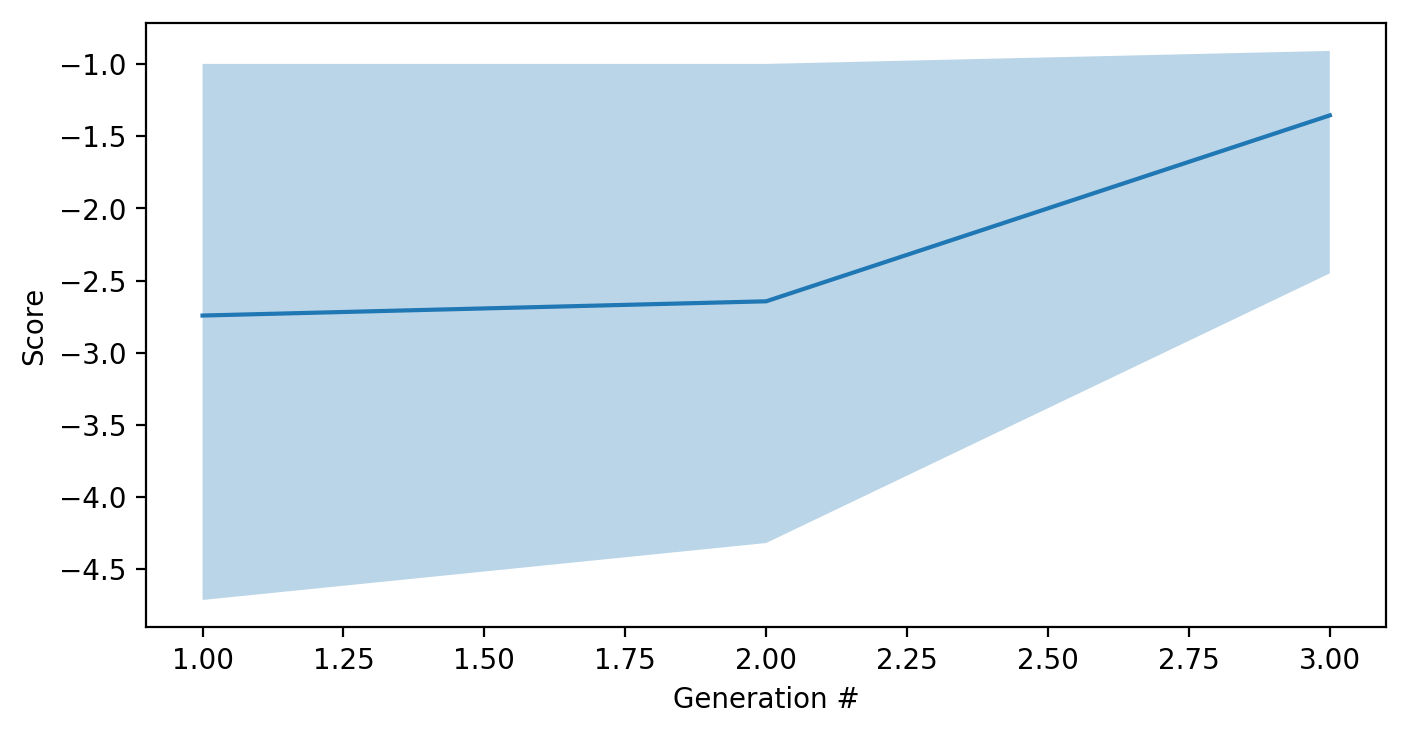

In [6]:
gens, all_scores = evolution.getScoresDuringEvolution()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=200)   
plt.plot(gens, np.nanmean(all_scores, axis=1))
plt.fill_between(gens, np.nanmin(all_scores, axis=1), np.nanmax(all_scores, axis=1), alpha=0.3)
plt.xlabel("Generation #")
plt.ylabel("Score")